In [235]:
from sklearn import datasets, svm, metrics, linear_model 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [236]:
# Load the data using Pandas
df = pd.read_csv('gapminder(1).csv')
df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832,2.11,0.5,2.489764,26.39123,15317,124.2604,76.0,13.0,America
135,26952719,2.46,0.1,4.476669,25.32054,3733,124.3462,68.7,49.2,Europe & Central Asia
136,86589342,1.86,0.4,1.479347,20.91630,4085,121.9367,75.4,26.2,East Asia & Pacific
137,13114579,5.88,13.6,0.148982,20.68321,3039,132.4493,52.0,94.9,Sub-Saharan Africa


Text(0.5, 1.0, 'Correlation Heatmap')

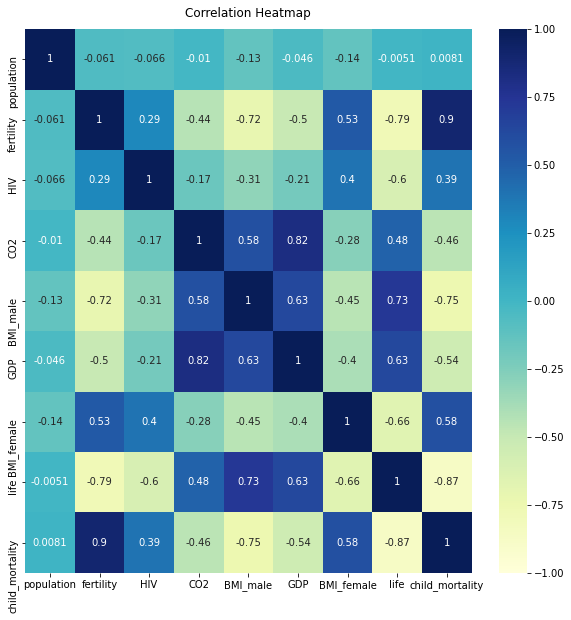

In [237]:
#Generate heat map from correlation values of all variables
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

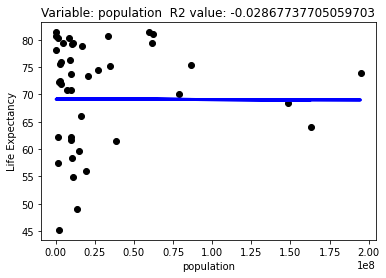

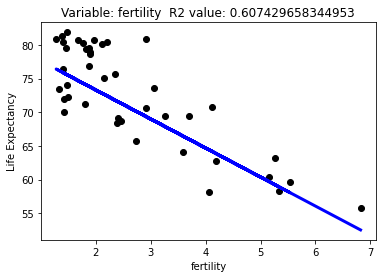

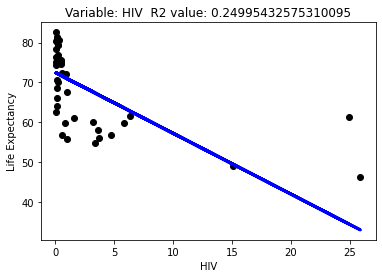

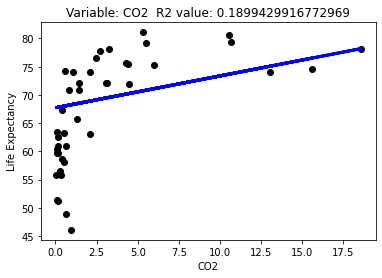

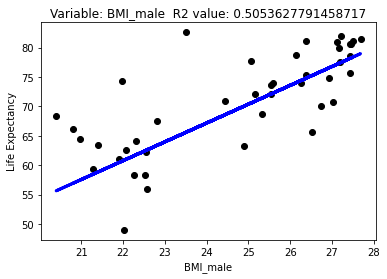

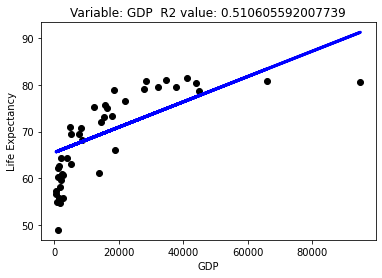

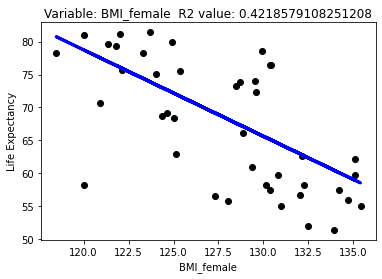

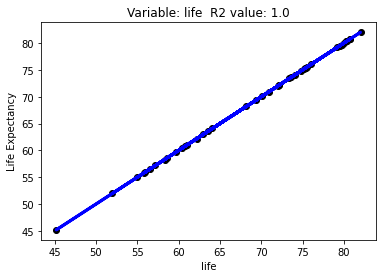

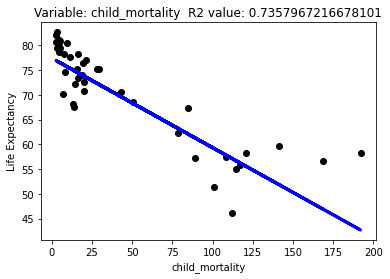

1  Column(s) are string


In [238]:
#Linear Regression
# Create linear regression object
regr = linear_model.LinearRegression()
#Create empty array to store R2 score values
r2 = []
#For string variables count how many to remove later 
string_col = 0 
#loop through each col except string col (region) and test regression with life excpectancy
for column in df:
    if column != "Region":
        #Create training set some .reshape required to format into arrays
        X_train, X_test, y_train, y_test = train_test_split(df[column].values.reshape((df.shape[0], 1)), df.life.values.reshape((df.shape[0], 1)), test_size = 0.3)
        # Train the model using the training sets
        regr.fit(X_train, y_train)
        # Make predictions using the testing set and save r2 score for that variable
        y_pred = regr.predict(X_test)
        r2 = np.append(r2, {column: metrics.r2_score(y_test, y_pred)})
        # Plot outputs
        plt.scatter(X_test, y_test, color="black")
        plt.plot(X_test, y_pred, color="blue", linewidth=3)
        plt.xlabel(column)
        plt.ylabel("Life Expectancy")
        plt.title("Variable: "+str(column)+"  R2 value: "+str(metrics.r2_score(y_test, y_pred)))
        plt.show()
    #Show how many string variables found
    else:
        string_col+=1
        print(str(string_col)+"  Column(s) are string")

    

In [239]:
#Apply KFold cross validation
X = df.iloc[:, [0,1,2,3,4,5,6,8]]
y = df.life
#Declare no. of folds
k = 5
kf = KFold(n_splits=k, random_state=None)
model = svm.SVC(kernel='linear', C=1, random_state=42)
result = cross_val_score(model , X, y, cv = kf)
print(result)
print("Avg accuracy: {}".format(result.mean()))

#I could not work out how to implement cross validation score without target variable


[nan nan nan nan nan]
Avg accuracy: nan


/Users/bendelaney/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bendelaney/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bendelaney/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "/Users/bendelaney/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "/Users/bendelaney/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  

In [240]:
# Load the data using Pandas
df = pd.read_csv('creditcard(1).csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [241]:
#Create classes accorinding to fraud or non fraud
frauds = df.loc[df['Class']==1]
non_frauds = df.loc[df['Class']==0]
print(len(frauds),"frauds:",len(non_frauds),"non frauds")

492 frauds: 284315 non frauds


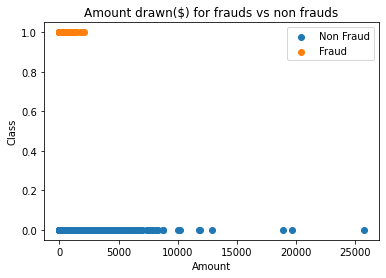

In [242]:
#Plot frauds aggainst amount withdrawn
plt.title('Amount drawn($) for frauds vs non frauds')
plt.scatter(non_frauds.Amount, non_frauds.Class, label="Non Fraud")
plt.scatter(frauds.Amount, frauds.Class, label="Fraud")
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

In [243]:
#Create training set
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.Class, test_size = 0.3)
# Create model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
#Create xonfusion matrix with test scores
test_matrix = metrics.confusion_matrix(y_test, y_pred)
test_matrix

/Users/bendelaney/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[85260,    43],
       [   39,   101]])

Text(69.0, 0.5, 'True label')

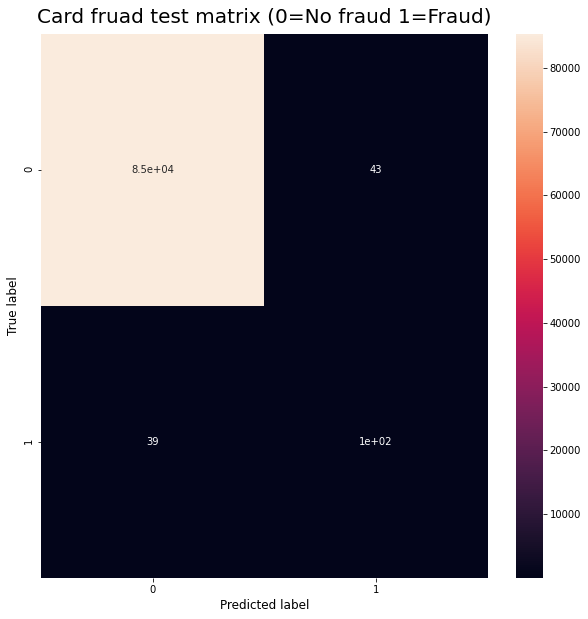

In [244]:
#Plot confusion matrix 
plt.figure(figsize=(10, 10))
matrix = sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
matrix.set_title('Card fruad test matrix (0=No fraud 1=Fraud)', fontdict={'fontsize':20}, pad=12);
matrix.set_xlabel("Predicted label", fontsize = 12)
matrix.set_ylabel("True label", fontsize = 12)